# Dynamic Pricing Strategy

Dynamic pricing is a pricing strategy that applies variable prices instead of fixed prices. Instead of deciding on a set price for a season, retailers can update their prices multiple times per day to capitalize on the ever-changing market.

So, in a dynamic pricing strategy, the aim is to maximize revenue and profitability by pricing items at the right level that balances supply and demand dynamics. It allows businesses to adjust prices dynamically based on factors like time of day, day of the week, customer segments, inventory levels, seasonal fluctuations, competitor pricing, and market conditions.

# Data

The dataset useded in this project is from Statso website

A ride-sharing company wants to implement a dynamic pricing strategy to optimize fares based on real-time market conditions. The company only uses ride duration to decide ride fares currently. The company aims to leverage data-driven techniques to analyze historical data and develop a predictive model that can dynamically adjust prices in response to changing factors.

A dataset containing historical ride data has been provided. The dataset includes features such as the number of riders, number of drivers, location category, customer loyalty status, number of past rides, average ratings, time of booking, vehicle type, expected ride duration, and historical cost of the rides.

Your goal is to build a dynamic pricing model that incorporates the provided features to predict optimal fares for rides in real-time. The model must consider factors such as demand patterns and supply availability.

Let's start by preparing libraries needed in this project

In [4]:
# Importing libraries that will be used in this project
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

Now it's time to import our dataset

In [5]:
# Importing dataset using pandas
data = pd.read_csv("Data/dynamic_pricing.csv")

# Preview the first 5 rows of the data
data.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


## Exploratory Data Analysis

Let's get some info about the data

In [9]:
# Using the pandas info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


We can see that there are 1000 row without any null
Also some columns contain numerical data others not, we should consider that while applying functions of methods take just numerical data

Now let's get some desctiptive informations about the data

In [10]:
# Using describe() method
data.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


Now let's look at the relationship between expected ride duration and historical cost of the ride:

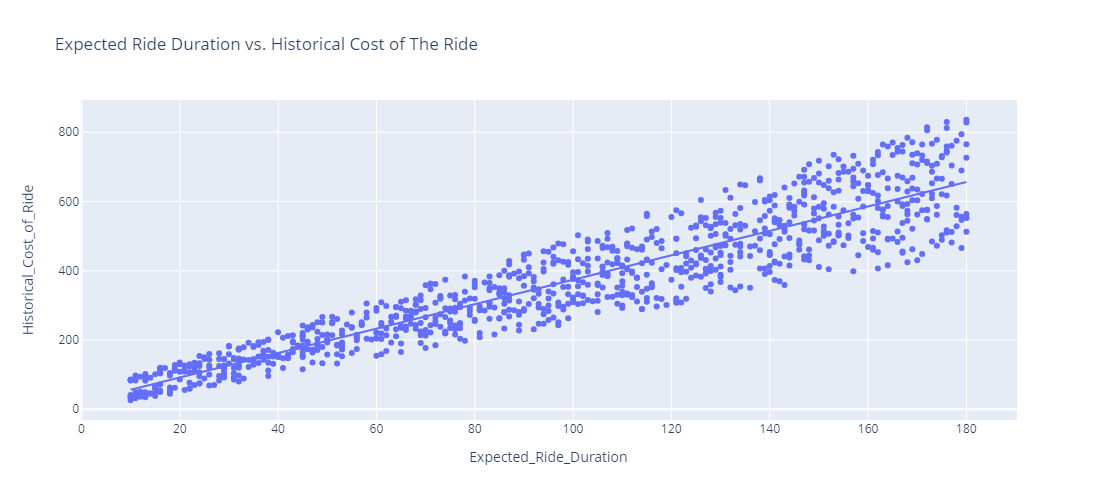

In [19]:
# Creating a figure and plot a scatter plot to show the relationship
fig = px.scatter(data, x="Expected_Ride_Duration",
                y="Historical_Cost_of_Ride",
                title="Expected Ride Duration vs. Historical Cost of The Ride",
                trendline="ols",
                height=500, width=1000)

# Showing the scatter plot
fig.show()

We can see from the scatter plot that the tredn is up, and that means the more the expected ride duration increases the historical cost of ride increases also.

Now we'll have a look at the distribution of the historical cost of rides based on the vehicle type:

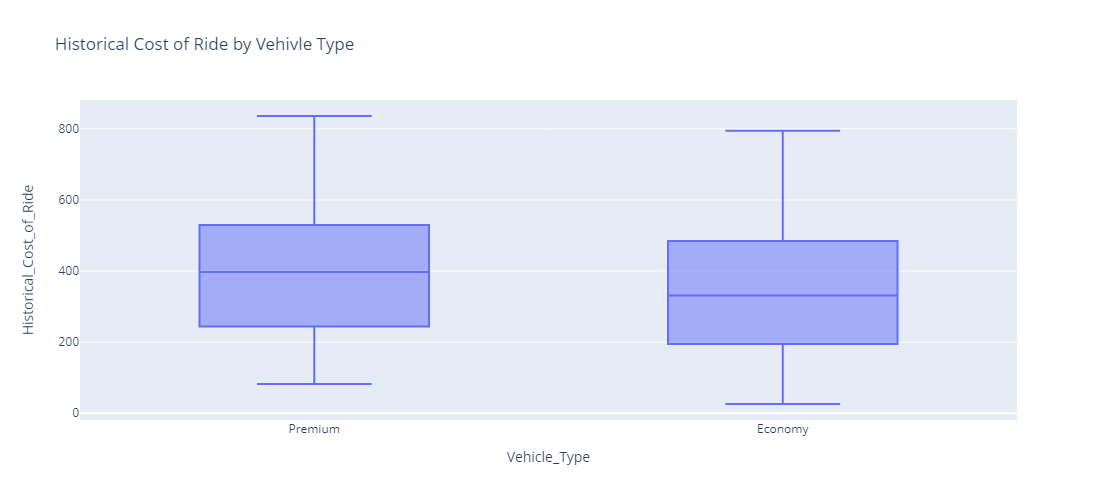

In [21]:
# We'll create a figure and plot box plot
fig = px.box(data, x="Vehicle_Type",
             y="Historical_Cost_of_Ride",
             title="Historical Cost of Ride by Vehivle Type",
             height=500)
fig.show()

We have only two types of vehicle so that's why we prefered using box plot, it allows us to see the distribution of Historical Cost of Ride with some statistical values such as min, max, median, Q1 and Q3

Now it's time to look for the relationship between different columns and for that we'll use the correlation matrix

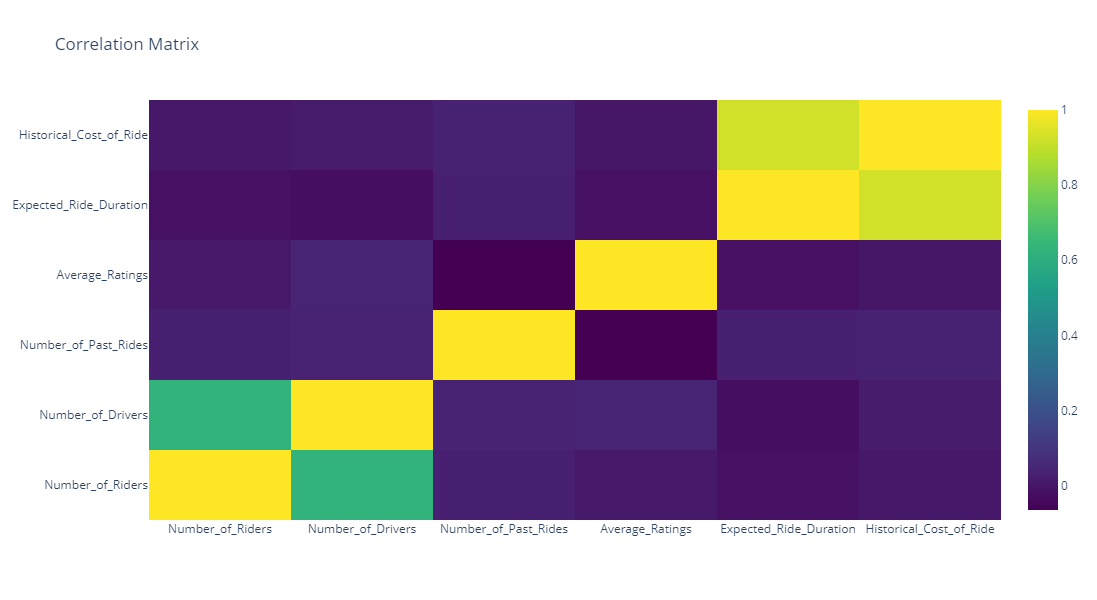

In [59]:
# Creating the correlation matrix using pandas corr() method
# Before that we need to drop non numerical columns
non_numerical = data.select_dtypes(exclude="object")
corr_matrix = non_numerical.corr()
corr_matrix

fig = go.Figure(data=go.Heatmap(z=corr_matrix.values, 
                                x=corr_matrix.columns, 
                                y=corr_matrix.columns,
                                colorscale='Viridis'))

fig.update_layout(title='Correlation Matrix',
                  height=600, width=1000)
fig.show()

We can see that the Historical Cost of Ride is effected by Expected Ride Duration

## Implementing a Dynamic Pricing Strategy

Here's how to implement the dynamix princing strategy using python

In [79]:
# Calculate demand_multiplier based on percentile for high and low demand
high_demand_percentile = 75
low_demand_percentile = 25

data['demand_multiplier'] = np.where(data['Number_of_Riders'] > np.percentile(data['Number_of_Riders'], high_demand_percentile),
                                     data['Number_of_Riders'] / np.percentile(data['Number_of_Riders'], high_demand_percentile),
                                     data['Number_of_Riders'] / np.percentile(data['Number_of_Riders'], low_demand_percentile))

# Calculate supply_multiplier based on percentile for high and low supply
high_supply_percentile = 75
low_supply_percentile = 25

data['supply_multiplier'] = np.where(data['Number_of_Drivers'] > np.percentile(data['Number_of_Drivers'], low_supply_percentile),
                                     np.percentile(data['Number_of_Drivers'], high_supply_percentile) / data['Number_of_Drivers'],
                                     np.percentile(data['Number_of_Drivers'], low_supply_percentile) / data['Number_of_Drivers'])

# Define price adjustment factors for high and low demand/supply
demand_threshold_high = 1.2  # Higher demand threshold
demand_threshold_low = 0.8  # Lower demand threshold
supply_threshold_high = 0.8  # Higher supply threshold
supply_threshold_low = 1.2  # Lower supply threshold

# Calculate adjusted_ride_cost for dynamic pricing
data['adjusted_ride_cost'] = data['Historical_Cost_of_Ride'] * (
    np.maximum(data['demand_multiplier'], demand_threshold_low) *
    np.maximum(data['supply_multiplier'], supply_threshold_high)
)

In the above code, we first calculated the demand multiplier by comparing the number of riders to percentiles representing high and low demand levels. If the number of riders exceeds the percentile for high demand, the demand multiplier is set as the number of riders divided by the high-demand percentile. Otherwise, if the number of riders falls below the percentile for low demand, the demand multiplier is set as the number of riders divided by the low-demand percentile.

Next, we calculated the supply multiplier by comparing the number of drivers to percentiles representing high and low supply levels. If the number of drivers exceeds the low-supply percentile, the supply multiplier is set as the high-supply percentile divided by the number of drivers. On the other hand, if the number of drivers is below the low-supply percentile, the supply multiplier is set as the low-supply percentile divided by the number of drivers.

Finally, we calculated the adjusted ride cost for dynamic pricing. It multiplies the historical cost of the ride by the maximum of the demand multiplier and a lower threshold (demand_threshold_low), and also by the maximum of the supply multiplier and an upper threshold (supply_threshold_high). This multiplication ensures that the adjusted ride cost captures the combined effect of demand and supply multipliers, with the thresholds serving as caps or floors to control the price adjustments.

Now let’s calculate the profit percentage we got after implementing this dynamic pricing strategy:

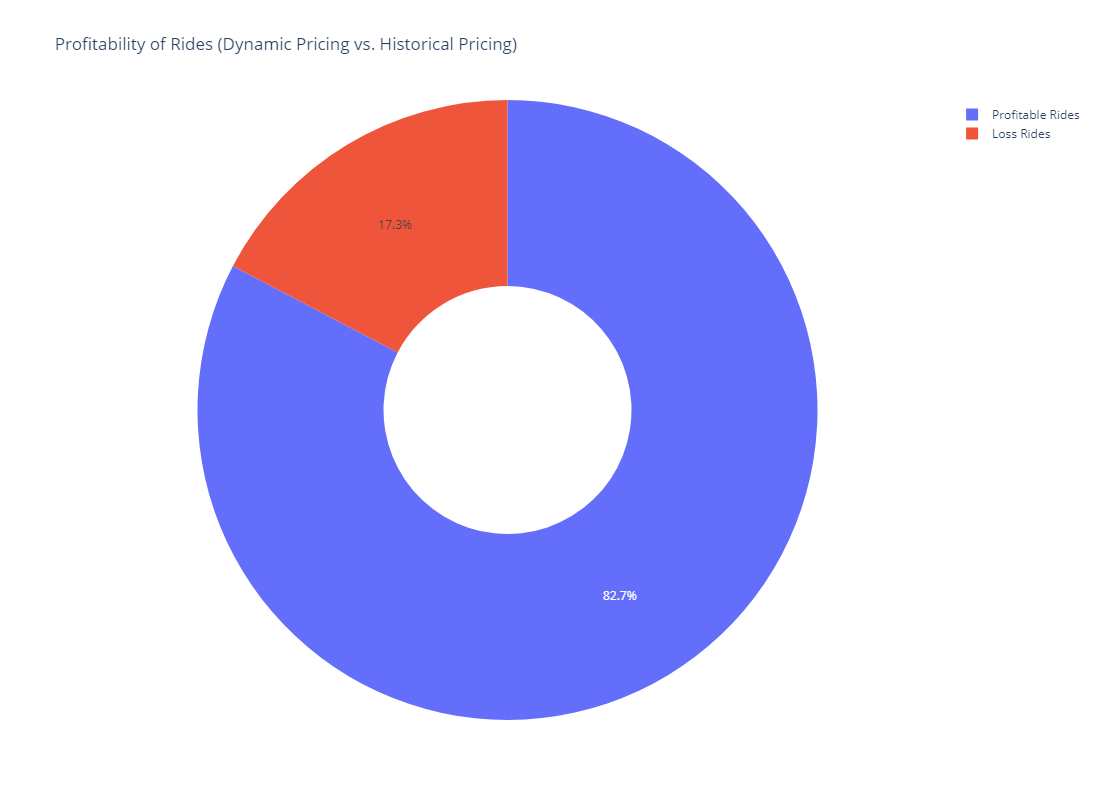

In [80]:
# Calculate the profit percentage for each ride
data['profit_percentage'] = ((data['adjusted_ride_cost'] - data['Historical_Cost_of_Ride']) / data['Historical_Cost_of_Ride']) * 100
# Identify profitable rides where profit percentage is positive
profitable_rides = data[data['profit_percentage'] > 0]

# Identify loss rides where profit percentage is negative
loss_rides = data[data['profit_percentage'] < 0]


import plotly.graph_objects as go

# Calculate the count of profitable and loss rides
profitable_count = len(profitable_rides)
loss_count = len(loss_rides)

# Create a donut chart to show the distribution of profitable and loss rides
labels = ['Profitable Rides', 'Loss Rides']
values = [profitable_count, loss_count]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.4)])
fig.update_layout(title='Profitability of Rides (Dynamic Pricing vs. Historical Pricing)', height=800, width=800)
fig.show()

Now let’s have a look at the relationship between the expected ride duration and the cost of the ride based on the dynamic pricing strategy:

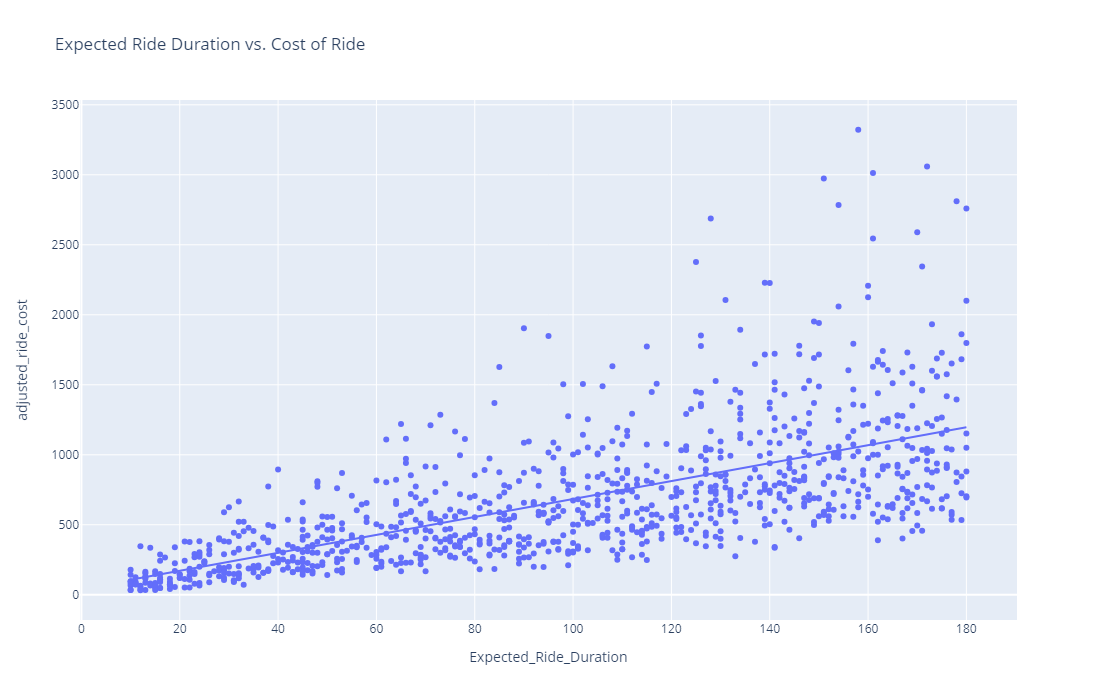

In [67]:
fig = px.scatter(data, 
                 x='Expected_Ride_Duration', 
                 y='adjusted_ride_cost',
                 title='Expected Ride Duration vs. Cost of Ride', 
                 trendline='ols',
                 height=700, width=1000)
fig.show()

## Training a Predictive Model

Now, as we have implemented a dynamic pricing strategy, let's train a Machine Learning Model.

Before training the model let's preprocess the data

In [72]:
from sklearn.preprocessing import StandardScaler

def data_preprocessing_pipeline(data):
    #Identify numeric and categorical features
    numeric_features = data.select_dtypes(include=['float', 'int']).columns
    categorical_features = data.select_dtypes(include=['object']).columns

    #Handle missing values in numeric features
    data[numeric_features] = data[numeric_features].fillna(data[numeric_features].mean())

    #Detect and handle outliers in numeric features using IQR
    for feature in numeric_features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        data[feature] = np.where((data[feature] < lower_bound) | (data[feature] > upper_bound),
                                 data[feature].mean(), data[feature])

    #Handle missing values in categorical features
    data[categorical_features] = data[categorical_features].fillna(data[categorical_features].mode().iloc[0])

    return data

As vehicle type is a valuable factor, let’s convert it into a numerical feature before moving forward:

In [73]:
data["Vehicle_Type"] = data["Vehicle_Type"].map({"Premium": 1, 
                                           "Economy": 0})

Now let’s split the data and train a Machine Learning model to predict the cost of a ride:

In [74]:
#splitting data
from sklearn.model_selection import train_test_split
x = np.array(data[["Number_of_Riders", "Number_of_Drivers", "Vehicle_Type", "Expected_Ride_Duration"]])
y = np.array(data[["adjusted_ride_cost"]])

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Reshape y to 1D array
y_train = y_train.ravel()
y_test = y_test.ravel()

# Training a random forest regression model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

Now let’s test this Machine Learning model using some input values:

In [75]:
def get_vehicle_type_numeric(vehicle_type):
    vehicle_type_mapping = {
        "Premium": 1,
        "Economy": 0
    }
    vehicle_type_numeric = vehicle_type_mapping.get(vehicle_type)
    return vehicle_type_numeric
  
# Predicting using user input values
def predict_price(number_of_riders, number_of_drivers, vehicle_type, Expected_Ride_Duration):
    vehicle_type_numeric = get_vehicle_type_numeric(vehicle_type)
    if vehicle_type_numeric is None:
        raise ValueError("Invalid vehicle type")
    
    input_data = np.array([[number_of_riders, number_of_drivers, vehicle_type_numeric, Expected_Ride_Duration]])
    predicted_price = model.predict(input_data)
    return predicted_price

# Example prediction using user input values
user_number_of_riders = 50
user_number_of_drivers = 25
user_vehicle_type = "Economy"
Expected_Ride_Duration = 30
predicted_price = predict_price(user_number_of_riders, user_number_of_drivers, user_vehicle_type, Expected_Ride_Duration)
print("Predicted price:", predicted_price)

Predicted price: [257.51489661]


Here’s a comparison of the actual and predicted results:

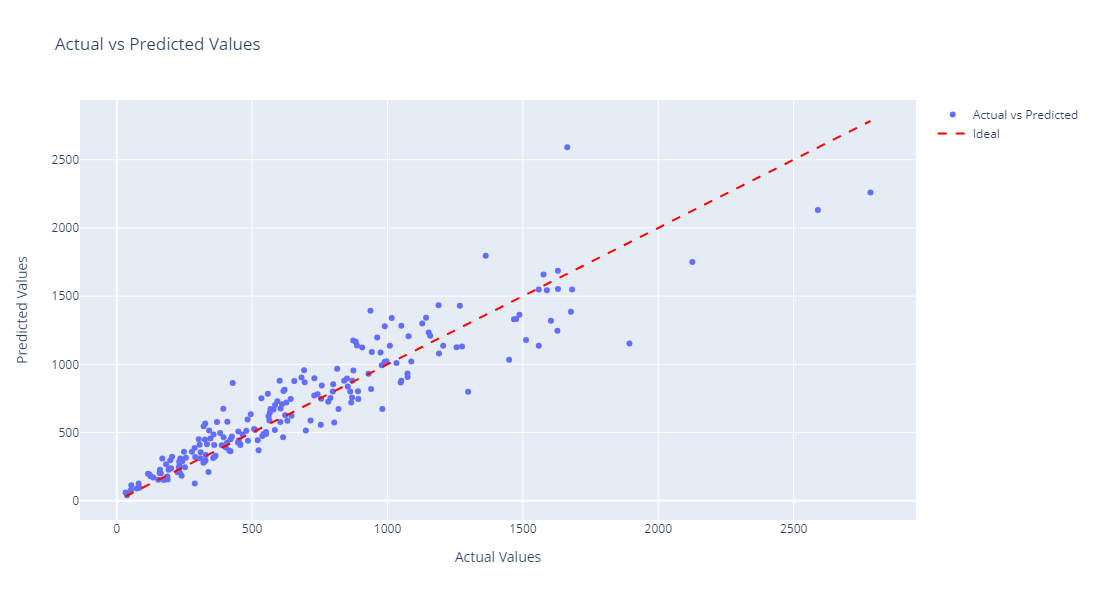

In [78]:
# Predict on the test set
y_pred = model.predict(x_test)

# Create a scatter plot with actual vs predicted values
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=y_test.flatten(),
    y=y_pred,
    mode='markers',
    name='Actual vs Predicted'
))

# Add a line representing the ideal case
fig.add_trace(go.Scatter(
    x=[min(y_test.flatten()), max(y_test.flatten())],
    y=[min(y_test.flatten()), max(y_test.flatten())],
    mode='lines',
    name='Ideal',
    line=dict(color='red', dash='dash')
))

fig.update_layout(
    title='Actual vs Predicted Values',
    xaxis_title='Actual Values',
    yaxis_title='Predicted Values',
    showlegend=True,
height=600)

fig.show()

So this is how you can use Machine Learning to implement a data-driven dynamic pricing strategy using Python.

# Summary

In a dynamic pricing strategy, the aim is to maximize revenue and profitability by pricing items at the right level that balances supply and demand dynamics. It allows businesses to adjust prices dynamically based on factors like time of day, day of the week, customer segments, inventory levels, seasonal fluctuations, competitor pricing, and market conditions.